In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier
import graphviz as gp
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
# read data
df = pd.read_csv("employee_attrition_previous_closure.csv")

# Pre-Processing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

### Check duplicates

In [4]:
dups = df.duplicated() #checks each row of the dataset and returns TRUE or FALSE depending on whether it is a duplicate
print(dups.any()) #returns TRUE if there is any value in dups that is equal to TRUE

False


In [5]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

### Check unique value

In [6]:
df.nunique()

Age                           39
Attrition                      2
BusinessTravel                 3
DailyRate                    692
Department                     3
DistanceFromHome              27
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1029
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                963
MonthlyRate                 1010
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
# drop columns with only one unique value
df = df.drop(columns=['StandardHours'])
df = df.drop(columns=['Over18'])
df = df.drop(columns=['EmployeeCount'])

# drop irrelevant column
df = df.drop(columns=['EmployeeNumber'])

### Check empty cells

In [8]:
df.isna().any()

Age                          True
Attrition                   False
BusinessTravel               True
DailyRate                    True
Department                  False
DistanceFromHome             True
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

#### Categogrical data

In [9]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', nan],
      dtype=object)

In [10]:
df.BusinessTravel.isna().sum()

5

In [11]:
# fill in missing values with the value appears most
values = {"BusinessTravel": "Travel_Rarely"}
df=df.fillna(value=values)

In [12]:
df['BusinessTravel'].value_counts()

Travel_Rarely        728
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64

In [13]:
df.MaritalStatus.unique()

array(['Divorced', 'Single', 'Married', nan], dtype=object)

In [14]:
df['MaritalStatus'].value_counts()

Married     474
Single      320
Divorced    230
Name: MaritalStatus, dtype: int64

In [15]:
df.MaritalStatus.isna().sum()
# deal with missing values in this one using "getdummy" later

5

In [16]:
df['MaritalStatus'].value_counts()

Married     474
Single      320
Divorced    230
Name: MaritalStatus, dtype: int64

In [17]:
# fill in missing values with the value appears most
values = {"MaritalStatus": "Married"}
df=df.fillna(value=values)

#### Numerical data

In [18]:
df.DailyRate.isna().sum()

27

In [19]:
df.DistanceFromHome.isna().sum()

95

In [20]:
df.Age.isna().sum()

136

In [21]:
df.Age.shape

(1029,)

##### Check the % of missing values to decide if it needs to be dropped

In [22]:
136/1029

0.13216715257531583

In [23]:
95/1029

0.0923226433430515

In [24]:
27/1029

0.026239067055393587

### Imputation

In [30]:
df_clean = df.copy()

In [31]:
# Age
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
df_clean[["Age"]] = imputer.fit_transform(df_clean[["Age"]])

In [32]:
# DailyRate
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
df_clean[["DailyRate"]] = imputer.fit_transform(df_clean[["DailyRate"]])

In [33]:
# DistanceFromHome
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
df_clean[["DistanceFromHome"]] = imputer.fit_transform(df_clean[["DistanceFromHome"]])

# Transform data

## Ordinal Encoding

In [34]:
df_clean["Attrition"] = df_clean["Attrition"].replace("Yes",1)
df_clean["Attrition"] = df_clean["Attrition"].replace("No",0)

In [35]:
df_clean["OverTime"] = df_clean["OverTime"].replace("Yes",1)
df_clean["OverTime"] = df_clean["OverTime"].replace("No",0)

In [36]:
df_clean["Gender"] = df_clean["Gender"].replace("Male",1)
df_clean["Gender"] = df_clean["Gender"].replace("Female",0)

In [37]:
# ordinal encoding
encoder = OrdinalEncoder(categories=[['Non-Travel','Travel_Rarely','Travel_Frequently']])
df_clean["BusinessTravel"] = encoder.fit_transform(df_clean[["BusinessTravel"]]) # transform data

## One-hot encoding

In [38]:
df_clean=df_clean.merge(pd.get_dummies(df_clean.Department),left_index=True, right_index=True)

In [39]:
df_clean.rename(columns={"Human Resources":"Dep_Human Resources"},inplace=True)

In [40]:
df_clean=df_clean.merge(pd.get_dummies(df_clean.EducationField),left_index=True, right_index=True)

In [41]:
df_clean=df_clean.merge(pd.get_dummies(df_clean.JobRole),left_index=True, right_index=True)

In [42]:
df_clean=df_clean.merge(pd.get_dummies(df_clean.MaritalStatus),left_index=True, right_index=True)

In [43]:
df_clean.isna().any()

Age                          False
Attrition                    False
BusinessTravel               False
DailyRate                    False
Department                   False
DistanceFromHome             False
Education                    False
EducationField               False
EnvironmentSatisfaction      False
Gender                       False
HourlyRate                   False
JobInvolvement               False
JobLevel                     False
JobRole                      False
JobSatisfaction              False
MaritalStatus                False
MonthlyIncome                False
MonthlyRate                  False
NumCompaniesWorked           False
OverTime                     False
PercentSalaryHike            False
PerformanceRating            False
RelationshipSatisfaction     False
StockOptionLevel             False
TotalWorkingYears            False
TrainingTimesLastYear        False
WorkLifeBalance              False
YearsAtCompany               False
YearsInCurrentRole  

In [44]:
df_clean.drop(columns="Department",inplace=True)
df_clean.drop(columns="EducationField",inplace=True)
df_clean.drop(columns="JobRole",inplace=True)
df_clean.drop(columns="MaritalStatus",inplace=True)

# Logistic regression

## Split data

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [46]:
Y=df_clean["Attrition"] #creating the dependent variable
X=df_clean.drop(columns=["Attrition"])

In [47]:
# Split data(X,Y) into train(X,Y), other(test and validation)(X,Y)
trainX, otherX, trainY, otherY = train_test_split(X, Y, test_size=0.5,random_state = 726)

In [48]:
# Split other into test and validation
testX, validationX, testY, validationY = train_test_split(otherX, otherY, test_size=0.5,random_state = 2000)

In [49]:
logm = LogisticRegression()
logm.fit(trainX, trainY.values.ravel()) # Fit a logistic regression with vector Y as dependent and matrix X as independent
print(logm.intercept_)
print(logm.coef_)

[0.0023853]
[[ 1.10911177e-02  3.47116824e-02  1.83993531e-04 -4.27376996e-03
   8.28709504e-02 -6.68991997e-02  3.18850637e-03 -2.22369303e-03
  -5.87348507e-02 -4.27504628e-03 -5.79905387e-02 -3.75817660e-05
   1.61527344e-05  1.62386609e-01  8.18183327e-02 -5.33046011e-02
  -4.41247671e-03 -3.38047450e-02 -4.24665531e-02 -9.66534392e-02
  -1.11256926e-01 -1.66976324e-02  7.67932328e-02 -1.08829027e-01
   8.04987875e-02 -9.71896501e-02 -1.50582132e-03 -2.00453297e-02
   2.39366132e-02  1.07185148e-03 -1.28857189e-02  2.13277596e-02
  -8.65800719e-03 -9.71485807e-03  1.12444353e-02 -1.69274803e-02
  -1.50582132e-03  9.14350329e-03  6.40910060e-04 -1.37328390e-03
  -5.02909826e-03 -2.75846574e-03  4.50583807e-03  1.56893604e-02
  -1.49867710e-02 -1.68597764e-02  3.42320096e-02]]


/opt/anaconda3/envs/DT_virtual_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
logm.predict_proba(validationX)

array([[0.80127679, 0.19872321],
       [0.97617652, 0.02382348],
       [0.67251167, 0.32748833],
       [0.73074532, 0.26925468],
       [0.56640339, 0.43359661],
       [0.94702267, 0.05297733],
       [0.83048706, 0.16951294],
       [0.81736088, 0.18263912],
       [0.71418135, 0.28581865],
       [0.96625129, 0.03374871],
       [0.95780309, 0.04219691],
       [0.85789408, 0.14210592],
       [0.67797461, 0.32202539],
       [0.77825648, 0.22174352],
       [0.91839577, 0.08160423],
       [0.91556228, 0.08443772],
       [0.92076158, 0.07923842],
       [0.93757524, 0.06242476],
       [0.90512082, 0.09487918],
       [0.84912532, 0.15087468],
       [0.90015825, 0.09984175],
       [0.98675708, 0.01324292],
       [0.82456925, 0.17543075],
       [0.85476931, 0.14523069],
       [0.86625295, 0.13374705],
       [0.96043271, 0.03956729],
       [0.81160452, 0.18839548],
       [0.98425989, 0.01574011],
       [0.98020308, 0.01979692],
       [0.69080828, 0.30919172],
       [0.

## coefficeient

In [51]:
summary = pd.DataFrame([trainX.columns, logm.coef_[0]]).T.sort_values(by = 1, ascending = False)
summary.columns = ['Variable', 'Coeff']
summary.head(n = 5)

,Variable,Coeff
13,NumCompaniesWorked,0.162387
4,Education,0.082871
14,OverTime,0.081818
24,YearsSinceLastPromotion,0.080499
22,YearsAtCompany,0.076793


**we can see the dataframe above, ```NumCompaniesWorked``` is the most inflencial factor to ```attrition```**

## AUC

In [52]:
Y_probs = logm.predict_proba(validationX)[:,1]

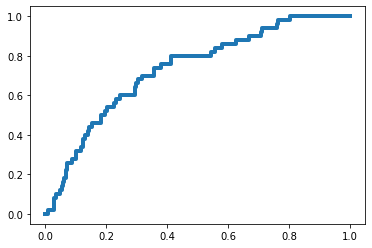

In [53]:
from matplotlib import pyplot
fpr, tpr, thresholds = metrics.roc_curve(validationY,Y_probs)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [54]:
roc_auc_score(validationY,Y_probs)

0.7307692307692308

## Result

In [55]:
# doesn't leave
Y_probs_0 = logm.predict_proba(validationX)[:,0]
Y_probs_0_list = list(Y_probs_0)
Y_probs_0_list

[0.8012767869211175,
 0.9761765163972791,
 0.6725116700573397,
 0.7307453195545732,
 0.5664033878087492,
 0.947022672603209,
 0.830487055633383,
 0.8173608809846471,
 0.7141813531800429,
 0.9662512879009872,
 0.9578030909720032,
 0.8578940786874427,
 0.6779746136131848,
 0.7782564793959318,
 0.9183957728450521,
 0.9155622787281059,
 0.9207615781853304,
 0.9375752439652781,
 0.905120819278929,
 0.849125319703098,
 0.9001582478901093,
 0.9867570789409268,
 0.8245692499083644,
 0.8547693054713006,
 0.866252947721855,
 0.9604327132531715,
 0.8116045247360326,
 0.984259891815018,
 0.9802030848424006,
 0.69080828199489,
 0.6676369733898679,
 0.9110176772453764,
 0.7183156899754706,
 0.7764815666921551,
 0.8925922947312234,
 0.7480334166210493,
 0.9159337815227433,
 0.9287295270385535,
 0.8030366973238798,
 0.978755487060305,
 0.8727936122019659,
 0.9342145423709385,
 0.9309960230979605,
 0.9723575546152083,
 0.9837806224915772,
 0.7825944195451868,
 0.8269605194463174,
 0.7625486152784641,
 

In [56]:
# leave
Y_probs_1=logm.predict_proba(validationX)[:,1]
Y_probs_1_list = list(Y_probs_1)
Y_probs_1_list

[0.19872321307888258,
 0.023823483602720893,
 0.3274883299426603,
 0.2692546804454268,
 0.4335966121912508,
 0.052977327396790994,
 0.16951294436661707,
 0.18263911901535287,
 0.285818646819957,
 0.03374871209901277,
 0.042196909027996825,
 0.14210592131255734,
 0.32202538638681527,
 0.22174352060406818,
 0.08160422715494786,
 0.08443772127189411,
 0.07923842181466961,
 0.06242475603472189,
 0.09487918072107104,
 0.150874680296902,
 0.09984175210989069,
 0.013242921059073183,
 0.17543075009163558,
 0.14523069452869947,
 0.13374705227814504,
 0.03956728674682854,
 0.18839547526396744,
 0.015740108184981987,
 0.019796915157599435,
 0.30919171800511003,
 0.3323630266101321,
 0.08898232275462359,
 0.28168431002452937,
 0.22351843330784496,
 0.10740770526877665,
 0.2519665833789507,
 0.08406621847725665,
 0.07127047296144655,
 0.1969633026761202,
 0.021244512939695037,
 0.12720638779803406,
 0.06578545762906149,
 0.06900397690203956,
 0.02764244538479169,
 0.016219377508422846,
 0.217405580

# Predict probability in lyon

In [60]:
# read data
df1 = pd.read_csv("employee_attrition_lyon.csv")
df1

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,...,4,80,0,16,3,4,13,11,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,33.0,Travel_Frequently,430.0,Sales,7.0,3,Medical,1,1477,4,...,1,80,2,5,2,3,4,3,0,3
437,27.0,Non-Travel,210.0,Sales,1.0,1,Marketing,1,449,3,...,4,80,1,6,0,3,5,4,1,4
438,NaN,Travel_Rarely,1157.0,Research & Development,2.0,4,Medical,1,440,1,...,4,80,0,5,4,2,3,2,2,2
439,39.0,Travel_Rarely,1383.0,Human Resources,2.0,3,Life Sciences,1,909,4,...,3,80,2,13,2,3,5,4,0,4


## Pre-Processing data

In [61]:
# drop columns with only one unique value
df1 = df1.drop(columns=['StandardHours'])
df1 = df1.drop(columns=['Over18'])
df1 = df1.drop(columns=['EmployeeCount'])

# drop irrelevant column
df1 = df1.drop(columns=['EmployeeNumber'])

In [62]:
# Age
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
df1[["Age"]] = imputer.fit_transform(df1[["Age"]])

In [63]:
# DailyRate
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
df1[["DailyRate"]] = imputer.fit_transform(df1[["DailyRate"]])

In [64]:
# DistanceFromHome
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
df1[["DistanceFromHome"]] = imputer.fit_transform(df1[["DistanceFromHome"]])

In [65]:
# fill in missing values with the value appears most
values = {"BusinessTravel": "Travel_Rarely"}
df1 = df1.fillna(value = values)

In [66]:
# fill in missing values with the value appears most
values = {"MaritalStatus": "Married"}
df1=df1.fillna(value=values)

In [67]:
df1["OverTime"] = df1["OverTime"].replace("Yes",1)
df1["OverTime"] = df1["OverTime"].replace("No",0)
df1["Gender"] = df1["Gender"].replace("Male",1)
df1["Gender"] = df1["Gender"].replace("Female",0)

In [68]:
# ordinal encoding
encoder = OrdinalEncoder(categories=[['Non-Travel','Travel_Rarely','Travel_Frequently']])
df1["BusinessTravel"] = encoder.fit_transform(df1[["BusinessTravel"]]) # transform data

In [69]:
df1=df1.merge(pd.get_dummies(df1.Department),left_index=True, right_index=True)
df1.rename(columns={"Human Resources":"Dep_Human Resources"},inplace=True)

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       441 non-null    float64
 1   BusinessTravel            441 non-null    float64
 2   DailyRate                 441 non-null    float64
 3   Department                441 non-null    object 
 4   DistanceFromHome          441 non-null    float64
 5   Education                 441 non-null    int64  
 6   EducationField            441 non-null    object 
 7   EnvironmentSatisfaction   441 non-null    int64  
 8   Gender                    441 non-null    int64  
 9   HourlyRate                441 non-null    int64  
 10  JobInvolvement            441 non-null    int64  
 11  JobLevel                  441 non-null    int64  
 12  JobRole                   441 non-null    object 
 13  JobSatisfaction           441 non-null    int64  
 14  MaritalSta

In [71]:
# one-hot encoding
df1=df1.merge(pd.get_dummies(df1.EducationField),left_index=True, right_index=True)
df1=df1.merge(pd.get_dummies(df1.JobRole),left_index=True, right_index=True)
df1=df1.merge(pd.get_dummies(df1.MaritalStatus),left_index=True, right_index=True)

In [72]:
df1.drop(columns="Department",inplace=True)
df1.drop(columns="EducationField",inplace=True)
df1.drop(columns="JobRole",inplace=True)
df1.drop(columns="MaritalStatus",inplace=True)

## Logistic regression

In [73]:
#creating the dependent variable
X = df1

In [74]:
logm.predict_proba(X)

array([[0.90005839, 0.09994161],
       [0.76165911, 0.23834089],
       [0.74225702, 0.25774298],
       [0.95124202, 0.04875798],
       [0.90225504, 0.09774496],
       [0.90802751, 0.09197249],
       [0.83057349, 0.16942651],
       [0.59156424, 0.40843576],
       [0.78064215, 0.21935785],
       [0.82019727, 0.17980273],
       [0.72873822, 0.27126178],
       [0.91870479, 0.08129521],
       [0.61502236, 0.38497764],
       [0.88227639, 0.11772361],
       [0.83455931, 0.16544069],
       [0.91533054, 0.08466946],
       [0.76369921, 0.23630079],
       [0.93456341, 0.06543659],
       [0.87997145, 0.12002855],
       [0.89960469, 0.10039531],
       [0.87024093, 0.12975907],
       [0.89857704, 0.10142296],
       [0.80962589, 0.19037411],
       [0.82702236, 0.17297764],
       [0.84082004, 0.15917996],
       [0.98038701, 0.01961299],
       [0.75818234, 0.24181766],
       [0.95472643, 0.04527357],
       [0.75712271, 0.24287729],
       [0.85733018, 0.14266982],
       [0.

### Result

In [76]:
# leave
probs_pred_1 = logm.predict_proba(X)[:,1]
probs_pred_1_list = list(probs_pred_1)
probs_pred_1_list

[0.09994161181415692,
 0.23834088917552093,
 0.25774297786519773,
 0.04875798194051762,
 0.09774495583449551,
 0.09197248631289086,
 0.16942651066675793,
 0.408435759580558,
 0.21935784547586007,
 0.1798027346666544,
 0.2712617762258977,
 0.08129520860562763,
 0.38497764428765113,
 0.1177236087481236,
 0.16544069342784112,
 0.08466946301959123,
 0.2363007934605901,
 0.06543659259106344,
 0.12002855322200072,
 0.10039531192751844,
 0.12975907295571965,
 0.10142295732560083,
 0.19037410643042463,
 0.17297764126183193,
 0.1591799631342817,
 0.01961298900437655,
 0.24181765767541658,
 0.04527357426503618,
 0.24287729205401679,
 0.1426698191887107,
 0.10051607211079426,
 0.1033693907742639,
 0.05559621298392732,
 0.13213825375827587,
 0.17420022566794535,
 0.0812911935530703,
 0.030361519789919963,
 0.45164700854969037,
 0.31320235583040057,
 0.14856386627904636,
 0.10040153102453685,
 0.25311783848708347,
 0.23695428996628132,
 0.20541981941851892,
 0.32999672641261696,
 0.1413269829064990

In [77]:
# doesn't leave
probs_pred_0 = logm.predict_proba(X)[:,0]
probs_pred_0_list = list(probs_pred_0)
probs_pred_0_list

[0.900058388185843,
 0.761659110824479,
 0.7422570221348023,
 0.9512420180594824,
 0.9022550441655045,
 0.9080275136871091,
 0.830573489333242,
 0.591564240419442,
 0.78064215452414,
 0.8201972653333456,
 0.7287382237741022,
 0.9187047913943723,
 0.6150223557123489,
 0.8822763912518764,
 0.8345593065721588,
 0.9153305369804088,
 0.7636992065394099,
 0.9345634074089366,
 0.8799714467779993,
 0.8996046880724815,
 0.8702409270442804,
 0.8985770426743992,
 0.8096258935695754,
 0.8270223587381681,
 0.8408200368657183,
 0.9803870109956234,
 0.7581823423245835,
 0.9547264257349638,
 0.7571227079459832,
 0.8573301808112893,
 0.8994839278892057,
 0.8966306092257361,
 0.9444037870160726,
 0.8678617462417242,
 0.8257997743320546,
 0.9187088064469298,
 0.96963848021008,
 0.5483529914503096,
 0.6867976441695994,
 0.8514361337209536,
 0.8995984689754631,
 0.7468821615129165,
 0.7630457100337187,
 0.794580180581481,
 0.6700032735873831,
 0.858673017093501,
 0.7887600677000708,
 0.6886217528173473,
 0

# PCA

## Data pre-processing

In [78]:
check = pd.read_csv("Starting_model_22.csv")

In [79]:
# leave pro(take RCC)
check.drop(check.iloc[:, 48:79], inplace=True, axis=1)

In [80]:
check.drop(check.tail(2).index,inplace=True)

In [81]:
# drop columns with only one unique value
check = check.drop(columns=['StandardHours'])
check = check.drop(columns=['Over18'])
check = check.drop(columns=['EmployeeCount'])
check = check.drop(columns=['EmployeeNumber'])

In [82]:
# Age
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
check[["Age"]] = imputer.fit_transform(check[["Age"]])

In [83]:
# DailyRate
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
check[["DailyRate"]] = imputer.fit_transform(check[["DailyRate"]])

In [84]:
# DistanceFromHome
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
check[["DistanceFromHome"]] = imputer.fit_transform(check[["DistanceFromHome"]])

In [85]:
check["OverTime"] = check["OverTime"].replace("Yes",1)
check["OverTime"] = check["OverTime"].replace("No",0)
check["Gender"] = check["Gender"].replace("Male",1)
check["Gender"] = check["Gender"].replace("Female",0)

In [86]:
# fill in missing values with the value appears most
values = {"BusinessTravel": "Travel_Rarely"}
check = check.fillna(value = values)

In [87]:
# fill in missing values with the value appears most
values = {"MaritalStatus": "Married"}
check=check.fillna(value=values)

In [88]:
check=check.merge(pd.get_dummies(check.EducationField),left_index=True, right_index=True)
check=check.merge(pd.get_dummies(check.MaritalStatus),left_index=True, right_index=True)

In [89]:
# ordinal encoding
encoder = OrdinalEncoder(categories=[['Non-Travel','Travel_Rarely','Travel_Frequently']])
check["BusinessTravel"] = encoder.fit_transform(check[["BusinessTravel"]]) # transform data

In [90]:
final = check.drop(columns=["Department","EducationField","JobRole","MaritalStatus","ID"])

## Run PCA

In [92]:
forX = final.drop(columns="Prob (take RCC)")

### Standardlization

In [93]:
forX.values

array([[3.79974026e+01, 1.00000000e+00, 8.66000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.30000000e+01, 1.00000000e+00, 1.08400000e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.40000000e+01, 1.00000000e+00, 2.40000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.30000000e+01, 2.00000000e+00, 4.30000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.70000000e+01, 0.00000000e+00, 2.10000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.79974026e+01, 1.00000000e+00, 1.15700000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [94]:
x_scaled_1 = forX.values
x_scaled_2 = StandardScaler().fit_transform(x_scaled_1)

In [95]:
x_scaled = pd.DataFrame(x_scaled_2 )

In [96]:
from sklearn import decomposition as dcp
pca = dcp.PCA(n_components=10)
pca.fit(x_scaled)

PCA(n_components=10)

In [97]:
pca.explained_variance_ratio_

array([0.11264308, 0.07572994, 0.05873224, 0.04757937, 0.04502504,
       0.03990173, 0.03580711, 0.03315386, 0.03155916, 0.03005524])

In [98]:
explained_variance_ratio_cumul_sum=np.cumsum(pca.explained_variance_ratio_) #compute the cumulative sum

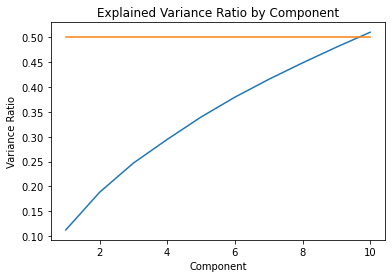

In [99]:
plt.title("Explained Variance Ratio by Component")
plt.plot(np.arange(1,11),explained_variance_ratio_cumul_sum)
plt.plot([1,10],[0.5,0.5])
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.show()

In [100]:
pca.explained_variance_

array([5.30631204, 3.56743324, 2.76671777, 2.24133582, 2.1210085 ,
       1.87966309, 1.68677662, 1.5617888 , 1.48666699, 1.41582158])

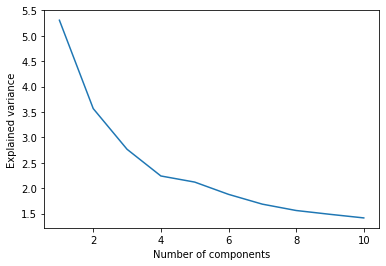

In [101]:
plt.plot(np.arange(1,11),pca.explained_variance_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

In [102]:
pca = dcp.PCA(n_components=4)
pca.fit(x_scaled)

PCA(n_components=4)

In [103]:
loadings=pd.DataFrame(pca.components_[0:2,:].T).set_index(np.arange(1,48))
loadings.columns = ['z1','z2']
loadings.index = forX.columns
loadings

,z1,z2
Age,0.234120,-0.083782
BusinessTravel,0.005015,0.023695
DailyRate,0.001930,-0.050471
Flag Sales,0.085674,0.477900
Flag HR,-0.007042,0.087046
Flag R&D,-0.079651,-0.499420
DistanceFromHome,0.012791,0.024342
Education,0.055849,-0.012699
EnvironmentSatisfaction,0.004805,0.032713
Gender,0.022955,0.011347


In [104]:
loadings["z1"].max()
# JobLevel

0.3764550443359893

In [105]:
loadings["z2"].max()
# Sale (can't use it bcs it's discriminated)

0.47790002526756087

# Group employeee

In [109]:
# df1 = lyondataset
forg = df1.copy()

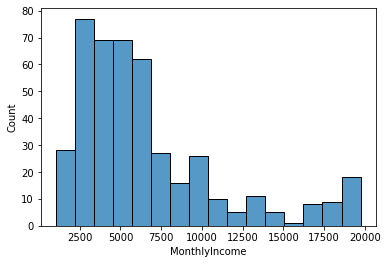

In [110]:
# check the distribution of the monthlyincome
sns.histplot(forg["MonthlyIncome"],kde=False)                                
plt.show()

In [111]:
for index, row in forg.iterrows():
    if row['MonthlyIncome'] <= 4308 and row['OverTime'] == 1:
        forg.loc[index,"group1"] = 1
    else:
        forg.loc[index,"group1"] = 0
    if row['MonthlyIncome'] <= 4308 and row['OverTime'] == 0:
        forg.loc[index,"group2"] = 1
    else:
        forg.loc[index,"group2"] = 0
    if (row['MonthlyIncome'] > 4308 and row['MonthlyIncome'] <= 8616) and row['OverTime'] == 1:
        forg.loc[index,"group3"] = 1
    else:
        forg.loc[index,"group3"] = 0
    if (row['MonthlyIncome'] > 4308 and row['MonthlyIncome'] <= 8616) and row['OverTime'] == 0:
        forg.loc[index,"group4"] = 1
    else:
        forg.loc[index,"group4"] = 0  
    if (row['MonthlyIncome'] > 8616 and row['MonthlyIncome'] <= 12924) and row['OverTime'] == 1:
        forg.loc[index,"group5"] = 1
    else:
        forg.loc[index,"group5"] = 0
    if (row['MonthlyIncome'] > 8616 and row['MonthlyIncome'] <= 12924) and row['OverTime'] == 0:
        forg.loc[index,"group6"] = 1
    else:
        forg.loc[index,"group6"] = 0
    if row['MonthlyIncome'] > 12924 and row['OverTime'] == 1:
        forg.loc[index,"group7"] = 1
    else:
        forg.loc[index,"group7"] = 0
    if row['MonthlyIncome'] > 12924 and row['OverTime'] == 0:
        forg.loc[index,"group8"] = 1
    else:
        forg.loc[index,"group8"] = 0

In [112]:
# check if there's none value
forg.isna().sum()

Age                          0
BusinessTravel               0
DailyRate                    0
DistanceFromHome             0
Education                    0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobSatisfaction              0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
Dep_Human Resources          0
Research & Development       0
Sales                        0
Human Resources_x            0
Life Sciences                0
Marketing                    0
Medical 

In [113]:
# if there IS none value use the code below to deal with that
forg.fillna(value=0,inplace=True)

In [114]:
forg.to_csv("grouping.csv")

# CAR

In [131]:
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 4)
classifier_DT.fit(trainX, trainY.values.ravel())

DecisionTreeClassifier(max_leaf_nodes=4)

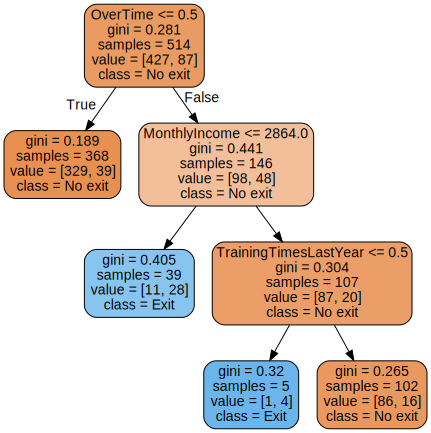

In [132]:
dot_data = export_graphviz(classifier_DT, feature_names = trainX.columns, 
                           filled = True, rounded = True, class_names=["No exit","Exit"])
graph = gp.Source(dot_data)
graph

## Track CAR accuracy

In [117]:
regressor_DT = DecisionTreeRegressor(max_leaf_nodes=10)
regressor_DT.fit(trainX, trainY)

DecisionTreeRegressor(max_leaf_nodes=10)

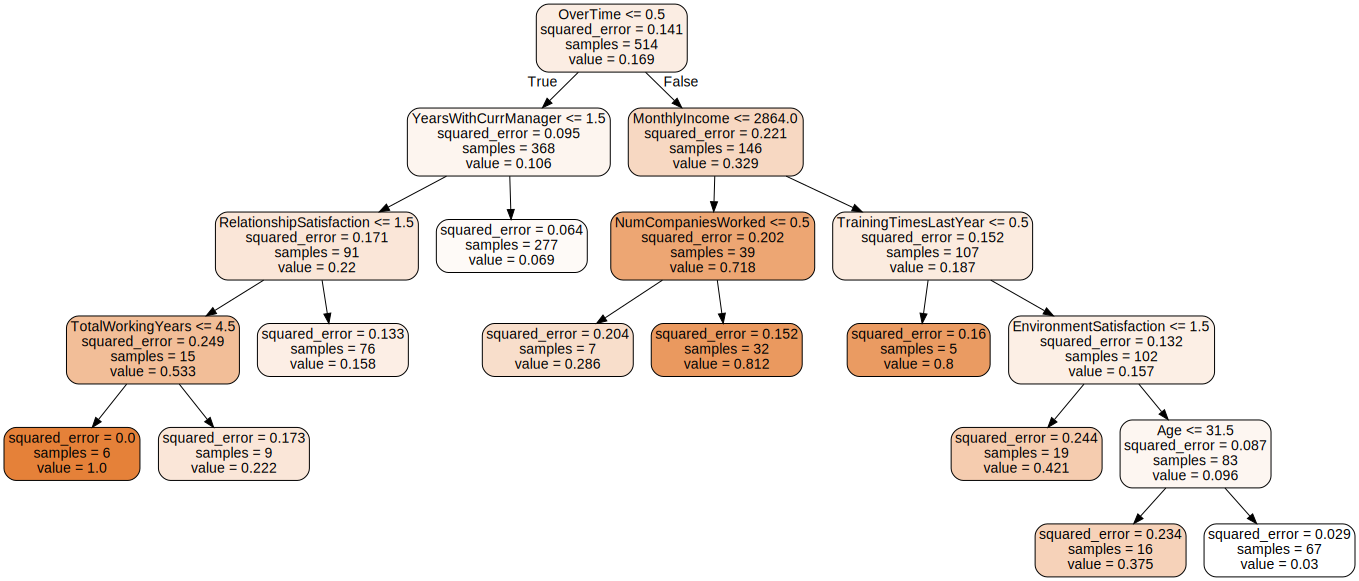

In [118]:
dot_data = export_graphviz(regressor_DT, feature_names = trainX.columns, filled = True, rounded = True)
graph = gp.Source(dot_data)
graph

In [119]:
ypredict = regressor_DT.predict(validationX)

score=mean_squared_error(validationY,ypredict)
score**(1/2)

0.3926866071382468

In [120]:
n_max_leaf_nodes = range(2,40) # Lets train the models with 2, 3, 4, ... 40 leaves

array = []

for n in n_max_leaf_nodes:
    
    #insert here the code to train the regressor on the dataset for varying levels of max_leaf_nodes
    regressor_DT = DecisionTreeRegressor(max_leaf_nodes=n)
    regressor_DT.fit(trainX, trainY)   
    
    #insert here the code that gives us the accuracy of the model on the validation set 
    ypredict = regressor_DT.predict(validationX)
    score=mean_squared_error(validationY,ypredict)
    
    array.append([n,score])

In [121]:
n_max_leaf_nodes = range(2,40) # Lets train the models with 2, 3, 4, ... 40 leafs
array_train= []

for n in n_max_leaf_nodes:
    
    #insert here the code to train the regressor on the dataset for varying levels of max_leaf_nodes
    regressor_DT = DecisionTreeRegressor(max_leaf_nodes=n)
    regressor_DT.fit(trainX, trainY)   
    
    #insert here the code that gives us the accuracy of the model on the training set 
    ypredict = regressor_DT.predict(trainX)
    score=mean_squared_error(trainY,ypredict)
    
    array_train.append([n,score])

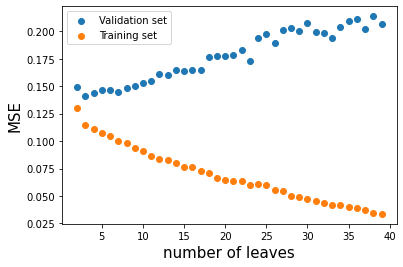

In [122]:
array = pd.DataFrame(array)
plt.scatter(array[0],array[1])

array_train = pd.DataFrame(array_train)
plt.scatter(array_train[0],array_train[1])
plt.legend(['Validation set','Training set'])
plt.xlabel("number of leaves",fontsize=15)
plt.ylabel("MSE",fontsize=15)
plt.show()

**choose around 4 leaves**

In [123]:
Xtrainval=trainX.append(validationX)
ytrainval=trainY.append(validationY)

/var/folders/65/l8gwbbg117z6hscwvjl3vg0m0000gn/T/ipykernel_68137/2042984975.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Xtrainval=trainX.append(validationX)
/var/folders/65/l8gwbbg117z6hscwvjl3vg0m0000gn/T/ipykernel_68137/2042984975.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ytrainval=trainY.append(validationY)


In [124]:
regressor_DT = DecisionTreeRegressor(max_leaf_nodes=5)
regressor_DT.fit(Xtrainval, ytrainval) 

DecisionTreeRegressor(max_leaf_nodes=5)

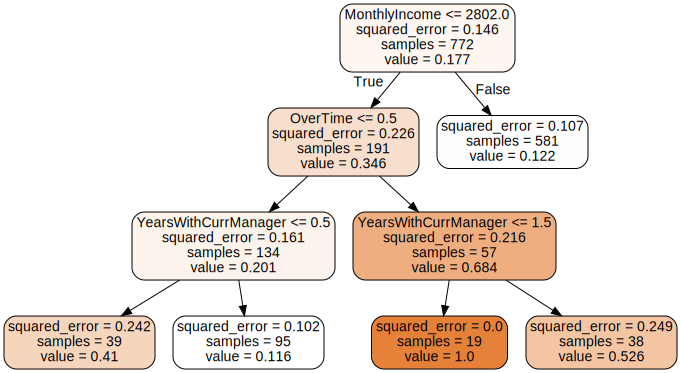

In [125]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(regressor_DT, feature_names = trainX.columns, filled = True, rounded = True)
graph = gp.Source(dot_data)
graph

# Question 4

In [126]:
q4 = pd.read_csv('Starting_model_22.csv')

monthlyincome = q4['MonthlyIncome']
workyears = q4['YearsAtCompany']

severancecsot = []
for x in range(len(q4)) :
    years = workyears[x]
    f = 0
    if years > 0 and years <= 10 :
        f = (monthlyincome[x] / 4) * years + (2 * monthlyincome[x])
    elif years > 10 :
        f = (monthlyincome[x] / 3) * years + (2 * monthlyincome[x])
    severancecsot.append(f)
print(severancecsot)
 
q4['Severance Package'] = severancecsot

[27504.75, 13350.0, 3498.75, 21879.0, 37455.33333333333, 10316.0, 13747.5, 6138.0, 73875.0, 5105.25, 9058.5, 92079.0, 19282.25, 8298.75, 9281.25, 21114.0, 17308.5, 21029.666666666668, 53320.5, 113380.0, 11306.75, 16477.5, 27612.0, 22420.0, 15980.0, 274204.0, 5215.5, 17157.25, 11115.0, 33756.333333333336, 19852.5, 21888.0, 16976.0, 26218.5, 15335.0, 35203.5, 58467.25, 4740.75, 8602.5, 9875.25, 34744.0, 21892.0, 14304.5, 7052.5, 6414.75, 20996.0, 29555.5, 14641.0, 20388.0, 4182.75, 49117.75, 15668.25, 169320.66666666666, 27562.5, 9665.5, 19992.0, 10278.75, 25364.0, 19961.5, 21428.5, 31707.0, 3186.0, 33507.0, 52917.0, 10748.25, 13311.0, 24856.0, 13923.0, 10757.5, 147933.0, 16521.0, 47367.5, 26405.5, 30184.0, 23180.5, 47957.0, 20077.0, 17875.0, 38445.0, 50643.0, 69772.5, 25556.0, 40218.75, 7860.0, 41570.66666666667, 10276.5, 17705.0, 14962.5, 16818.75, 24066.0, 22473.75, 0, 115622.0, 5571.0, 24141.0, 40477.0, 38790.0, 28177.0, 14920.75, 24945.25, 266630.0, 32533.75, 32529.5, 5701.5, 76993.

In [127]:
dataframe = pd.DataFrame(q4['Severance Package'])

In [128]:
dataframe.to_csv("dataframeforcost.csv")

# Question 7

In [199]:
v = pd.read_csv("grouping.csv")
v

,Unnamed: 0,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Married,Single,group1,group2,group3,group4,group5,group6,group7,group8
0,0,38.0,1.0,866.0,9.459948,3,4,1,84,3,...,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,53.0,1.0,1084.0,13.000000,2,4,0,57,4,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,24.0,1.0,240.0,22.000000,1,4,1,58,1,...,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,45.0,1.0,1339.0,7.000000,3,2,1,59,3,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,36.0,1.0,1396.0,9.459948,2,4,1,62,3,...,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,436,33.0,2.0,430.0,7.000000,3,4,1,54,3,...,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
437,437,27.0,0.0,210.0,1.000000,1,3,1,73,3,...,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
438,438,38.0,1.0,1157.0,2.000000,4,1,1,84,1,...,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
439,439,39.0,1.0,1383.0,2.000000,3,4,0,42,2,...,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Group1: employees whose monthly income is less than 4308 and work overtime.
    
Group2: employees whose monthly income is less than 4308 and doesn’t work overtime.
    
Group5: employees whose monthly income is larger than 8616 and less than 12924 and work overtime.
    
Group6: employees whose monthly income is larger than 8616 and less than 12924 and  doesn’t work overtime.


## Gender

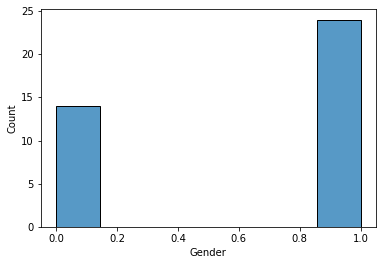

In [157]:
g1 = v[v["group1"]==1]
sns.histplot(g1["Gender"],kde=False)                                
plt.show()

In [158]:
g1["Gender"].value_counts()

1    24
0    14
Name: Gender, dtype: int64

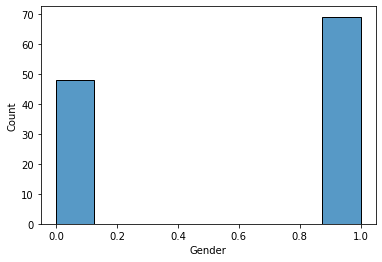

In [162]:
g2 = v[v["group2"]==1]
sns.histplot(g2["Gender"],kde=False)                                
plt.show()

In [163]:
g2["Gender"].value_counts()

1    69
0    48
Name: Gender, dtype: int64

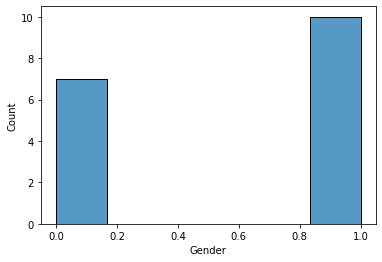

In [164]:
g5 = v[v["group5"]==1]
sns.histplot(g5["Gender"],kde=False)                                
plt.show()

In [165]:
g5["Gender"].value_counts()

1    10
0     7
Name: Gender, dtype: int64

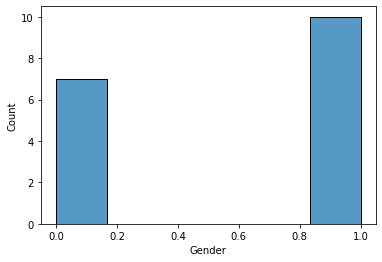

In [166]:
g6 = v[v["group6"]==1]
sns.histplot(g5["Gender"],kde=False)                                
plt.show()

In [167]:
g6["Gender"].value_counts()

1    25
0    10
Name: Gender, dtype: int64

### the percentage of females & the percentage of males

In [168]:
m = 24+69+10+25
f = 14+48+7+10

In [185]:
(m/(m+f))*100

61.83574879227053

In [186]:
(f/(m+f))*100

38.164251207729464

In [191]:
t = v[v["MonthlyIncome"]<=4308]
t["Gender"].value_counts()

1    93
0    62
Name: Gender, dtype: int64

In [203]:
for index, row in v.iterrows():
    if row['MonthlyIncome'] >=8616 and row['MonthlyIncome'] < 12924:
        v.loc[index,"test"] = 1
    else:
        v.loc[index,"test"] = 0

In [204]:
tt = v[v["test"]==1]
tt["Gender"].value_counts()

1    35
0    17
Name: Gender, dtype: int64

In [205]:
v["Gender"].value_counts()

1    265
0    176
Name: Gender, dtype: int64